In [1]:
from src.preprocessing import CleanSpectralData
from src.data_retrieval import GetData

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_retriever = GetData()
df = data_retriever.retrieve_sdss_data(
    sql_query="""
                SELECT TOP 5 s.fiberid, s.plate, s.mjd, s.run2d, s.class
                FROM PhotoObj AS p
                JOIN SpecObj AS s ON s.bestobjid = p.objid
                """
)

/home/deanhazineh/anaconda3/envs/dev/lib/python3.11/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Identifier info retrieved successfully.


In [7]:
clean_module = CleanSpectralData(dataframe=df)
init_data = clean_module.data
init_lam = init_data["lam"]
init_flux = init_data["flux"]


cleaned...


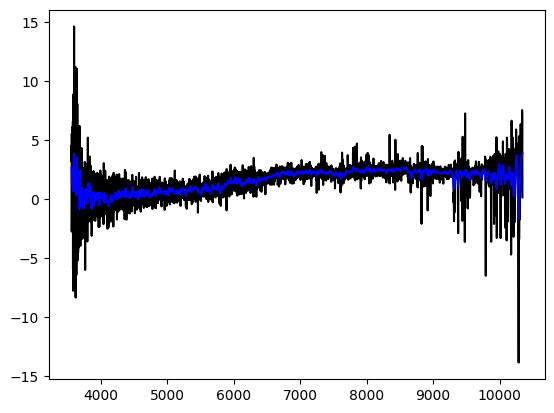

In [18]:
inf_cont = clean_module.get_inferred_continuum(sigma=4.0)

fig, ax = plt.subplots(1,1)
ax.plot(init_lam[0], init_flux[0], 'k-')
ax.plot(init_lam[0], inf_cont[0], 'b-')


In [19]:
# Remove outliers
clean_module.remove_flux_outliers_iqr()

# Correct redshift
data_rs = clean_module.correct_redshift().copy()
lam_rs = data_rs["lam"]
flux_rs = data_rs["flux"]

# Interpolate on new grid
lam = np.linspace(3100, 7000, 60)
flux = clean_module.interpolate_flux(lam)
normalized_flux = clean_module.get_normalize_flux()

Text(0.5, 1.0, 'Normalized ')

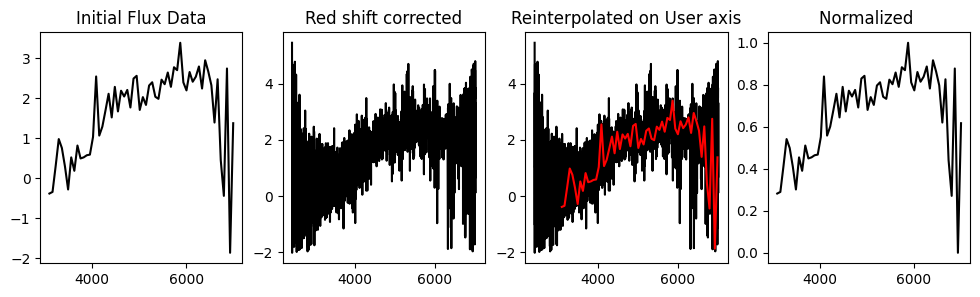

In [20]:
fig, ax = plt.subplots(1,4, figsize=(12,3))
ax[0].plot(init_lam[0], init_flux[0], 'k-')
ax[0].set_title("Initial Flux Data")
ax[1].plot(lam_rs[0], flux_rs[0], 'k-')
ax[1].set_title("Red shift corrected")

ax[2].plot(lam_rs[0], flux_rs[0], 'k-')
ax[2].plot(lam, flux[0], 'r-')
ax[2].set_title("Reinterpolated on User axis")

ax[3].plot(lam, normalized_flux[0], 'k-')
ax[3].set_title("Normalized ")